## Putting it altogether

[Machine Learning with Imbalanced Data - Course](https://www.trainindata.com/p/machine-learning-with-imbalanced-data)

In this notebook, we'll compare the performance of classical machine learning models with or without cost-sensitive learning, with the performance of random forests trained after under- or over sampling, and the performance returned by ensembles with resampling.

In [1]:
import pickle 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('../Section-04-Cost-Sensitive-Learning/cs_mean.pkl', 'rb') as f:
    cs_mean = pickle.load(f)

with open('../Section-04-Cost-Sensitive-Learning/cs_std.pkl', 'rb') as f:
    cs_std = pickle.load(f)

In [3]:
with open('../Section-05-Undersampling/us_mean.pkl', 'rb') as f:
    us_mean = pickle.load(f)

with open('../Section-05-Undersampling/us_std.pkl', 'rb') as f:
    us_std = pickle.load(f)

In [4]:
with open('../Section-06-Oversampling/os_mean.pkl', 'rb') as f:
    os_mean = pickle.load(f)

with open('../Section-06-Oversampling/os_std.pkl', 'rb') as f:
    os_std = pickle.load(f)

In [5]:
with open('../Section-08-Ensemble-Learning/ensemble_mean.pkl', 'rb') as f:
    ens_mean = pickle.load(f)

with open('../Section-08-Ensemble-Learning/ensemble_std.pkl', 'rb') as f:
    ens_std = pickle.load(f)

In [6]:
for dataset in ens_mean.keys():
    del ens_mean[dataset]['random_forests']
    del ens_std[dataset]['random_forests']
    
    del us_mean[dataset]['full_data']
    del us_std[dataset]['full_data']
    
    os_mean[dataset].update(cs_mean[dataset])
    os_mean[dataset].update(ens_mean[dataset])
    os_mean[dataset].update(us_mean[dataset])
    
    os_std[dataset].update(cs_std[dataset])
    os_std[dataset].update(ens_std[dataset])
    os_std[dataset].update(us_std[dataset])

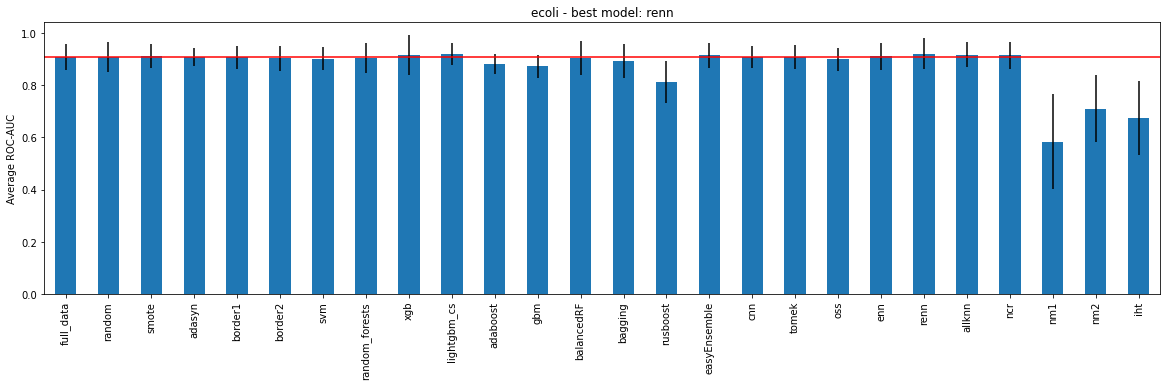

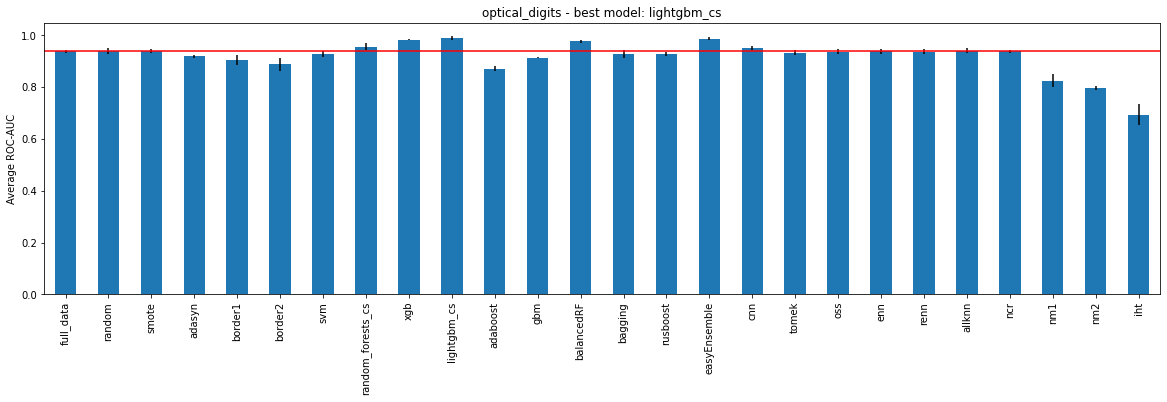

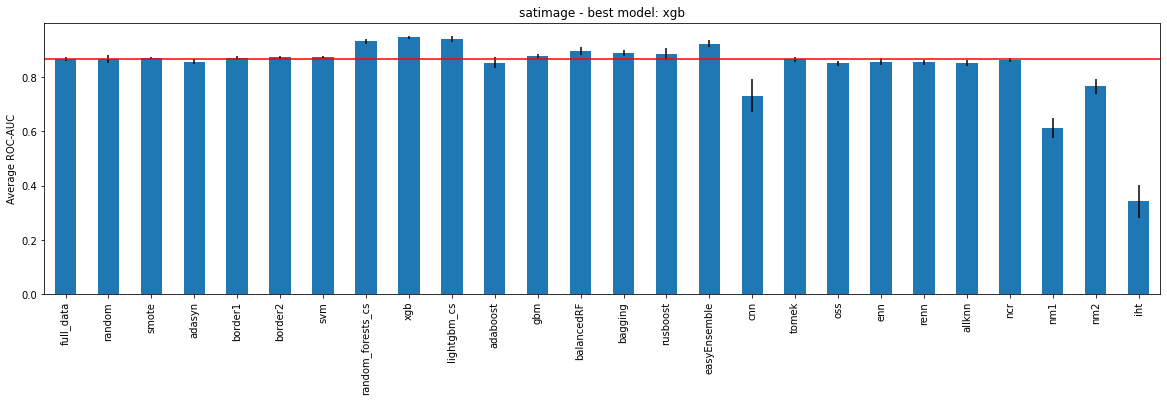

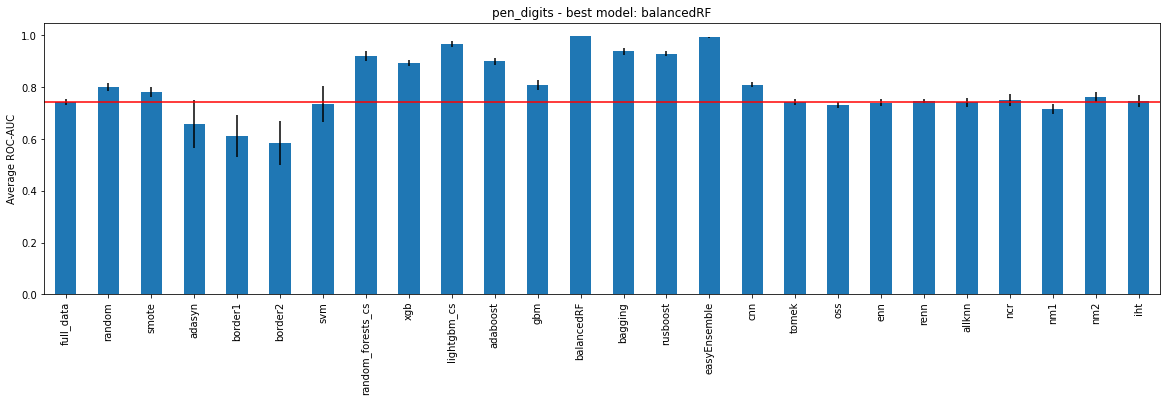

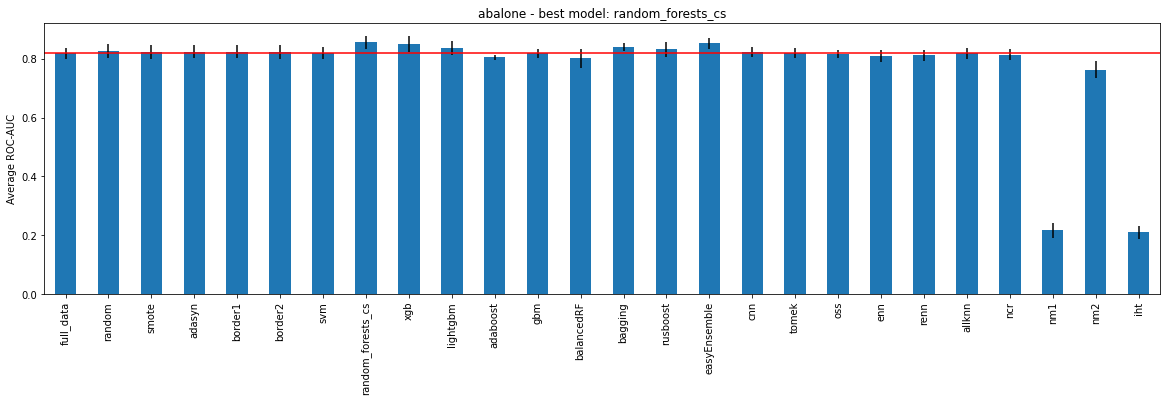

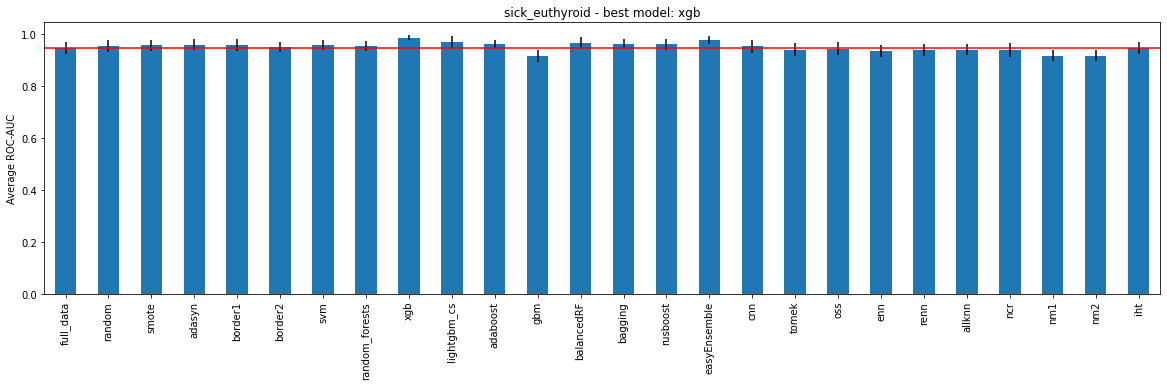

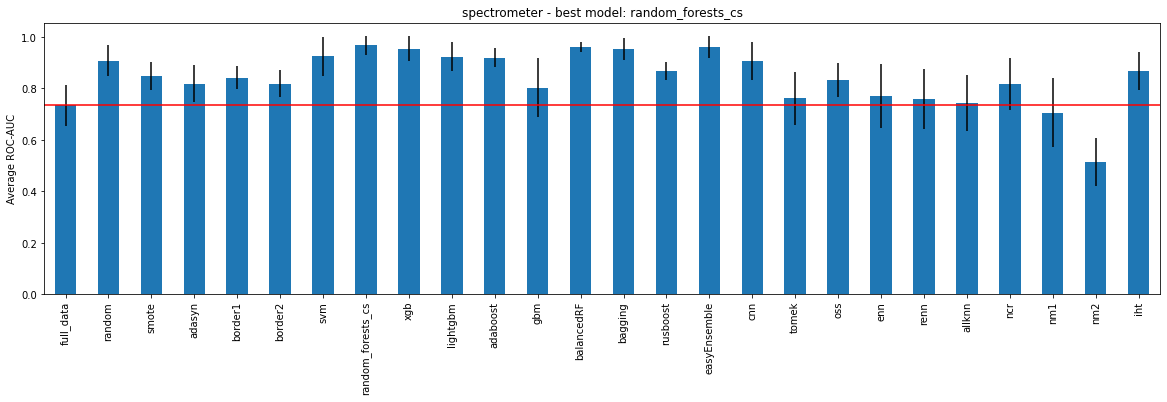

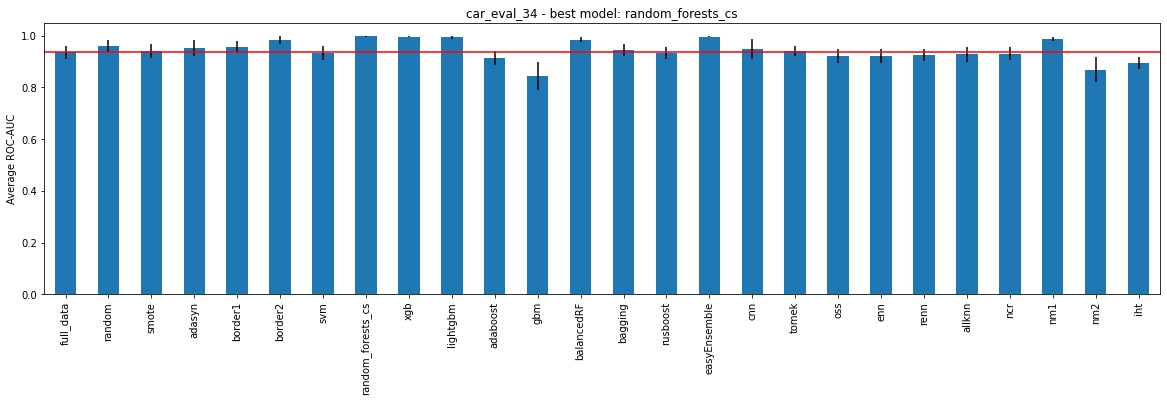

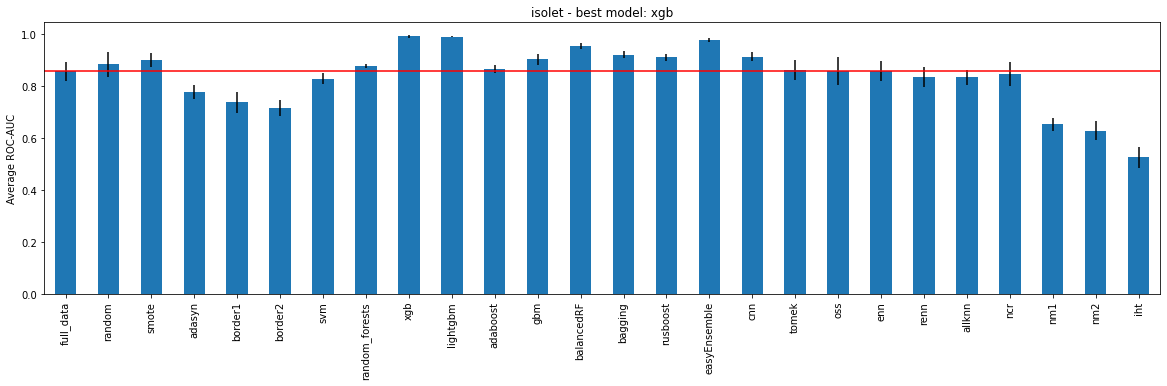

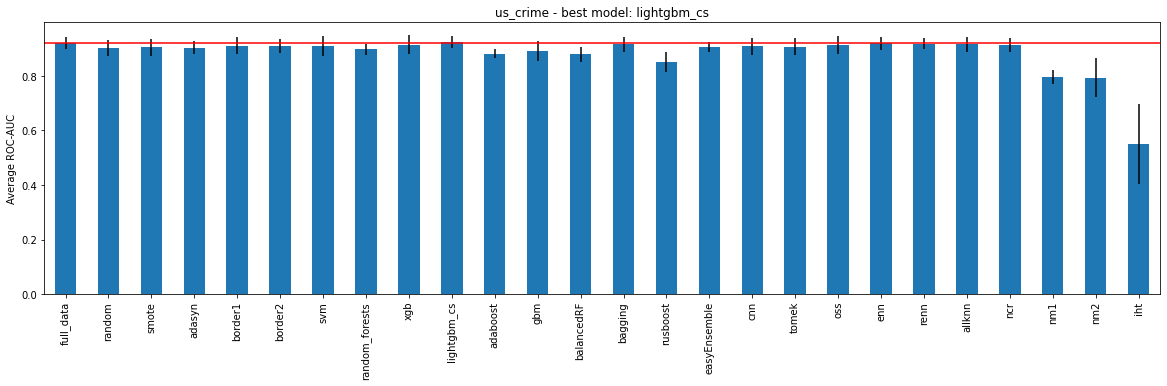

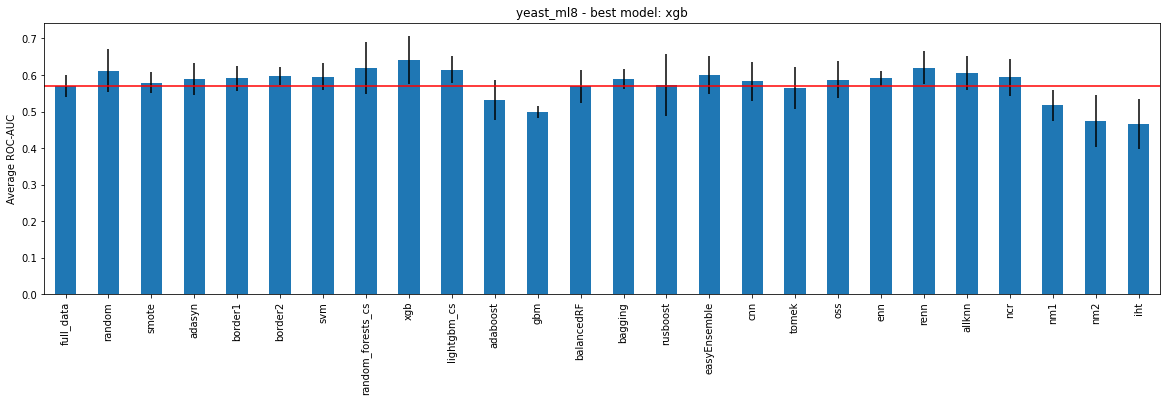

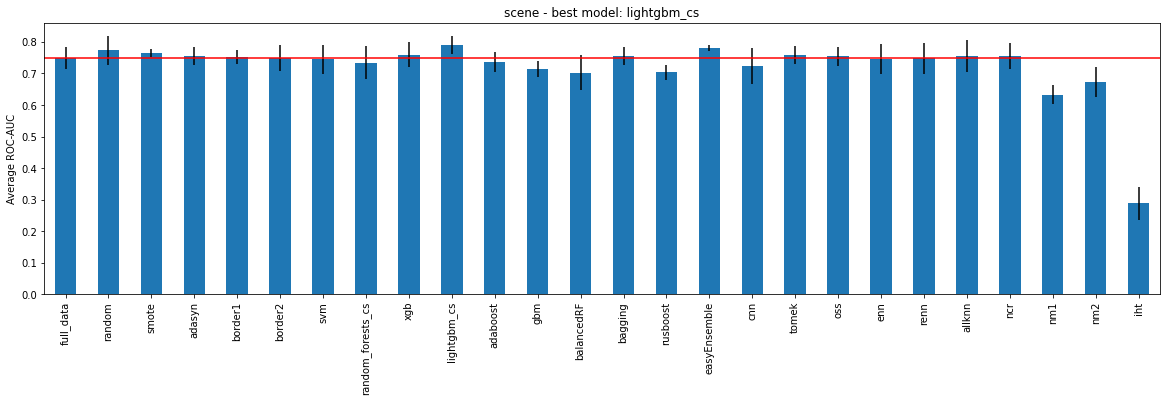

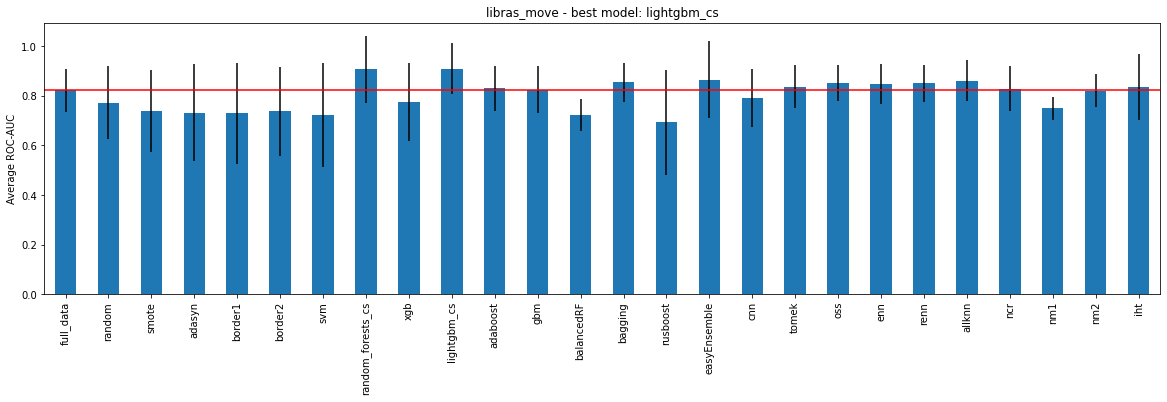

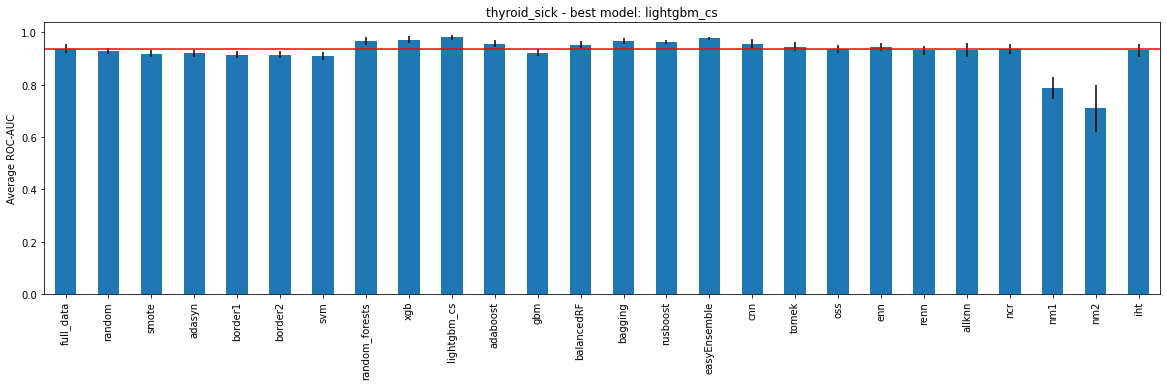

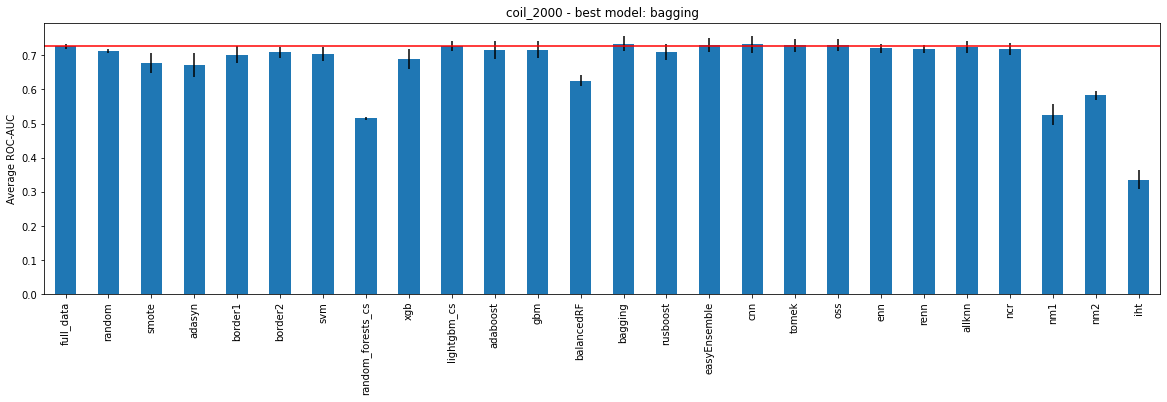

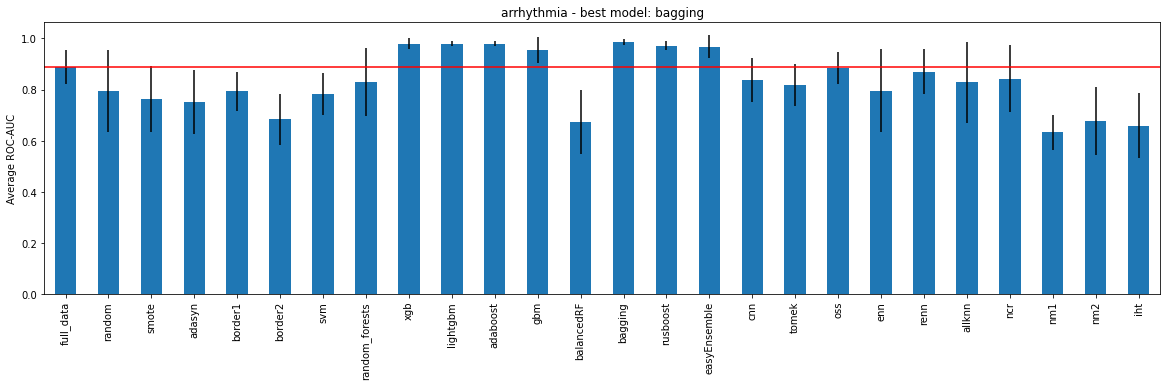

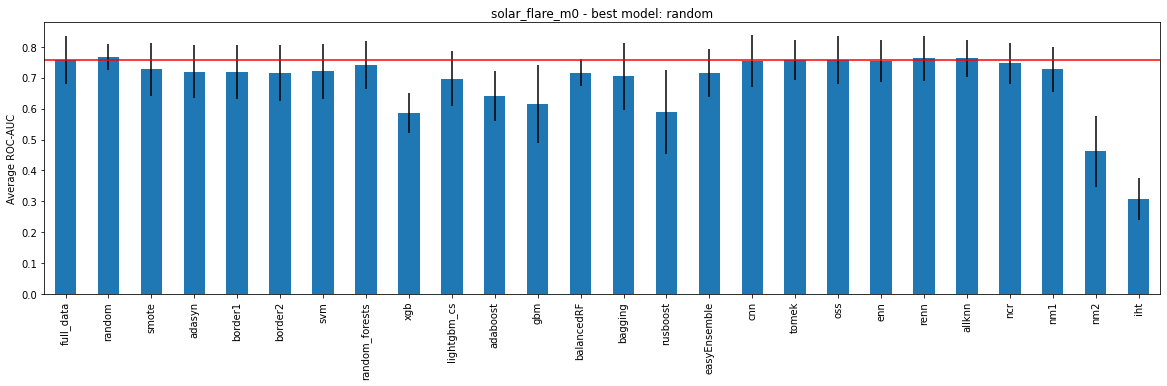

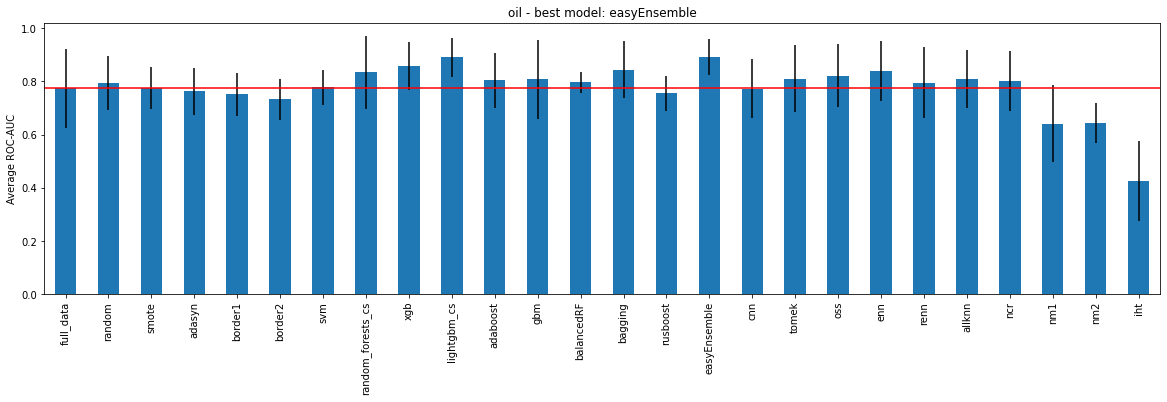

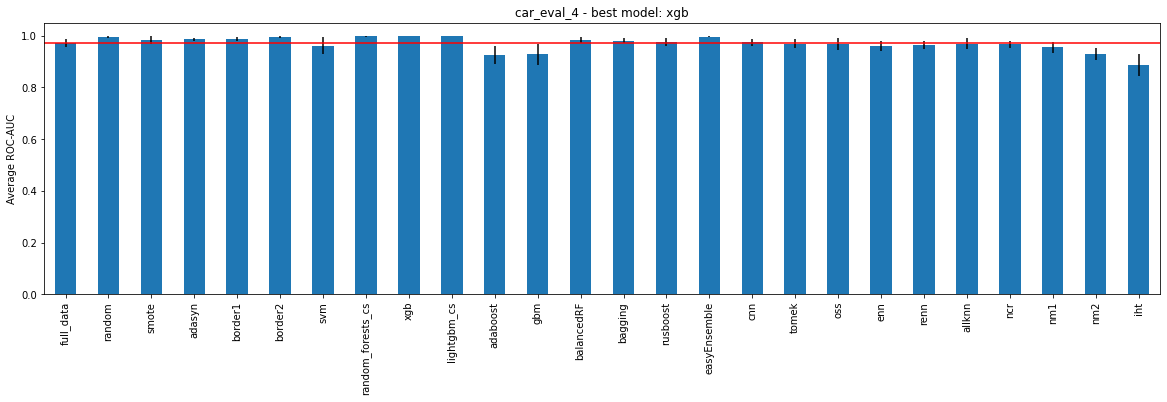

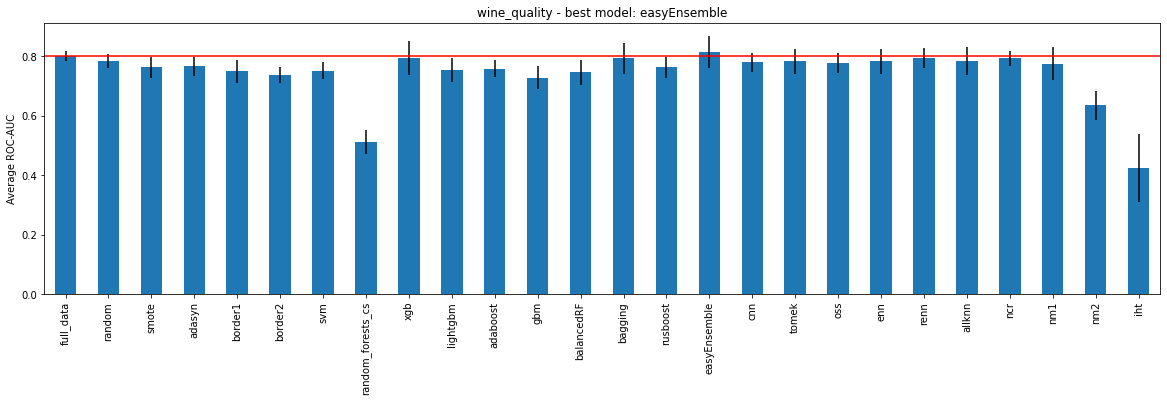

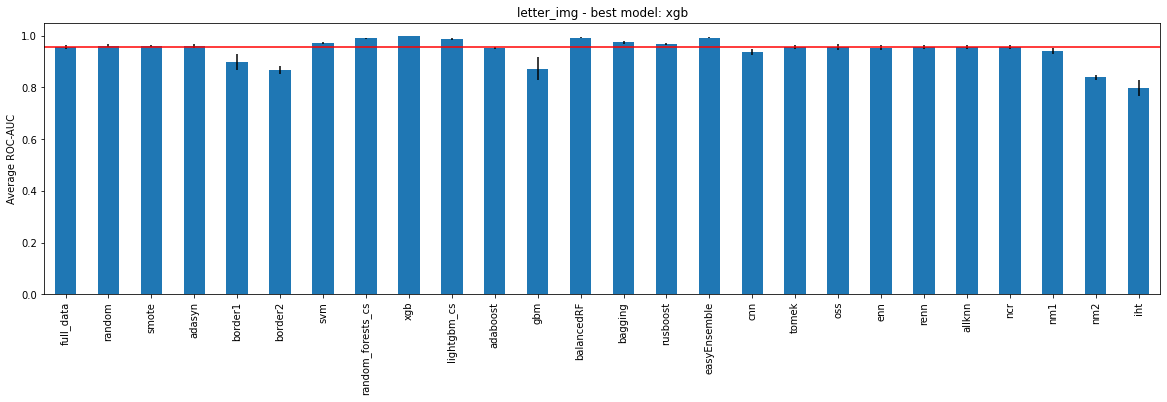

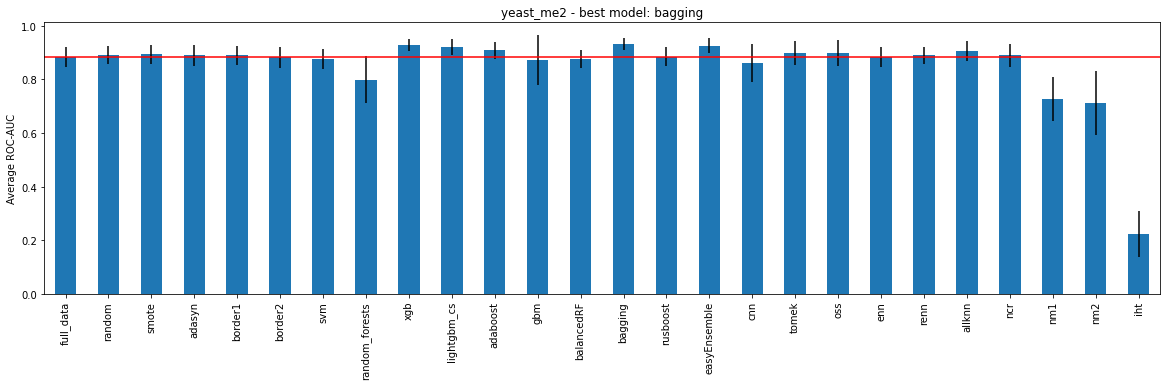

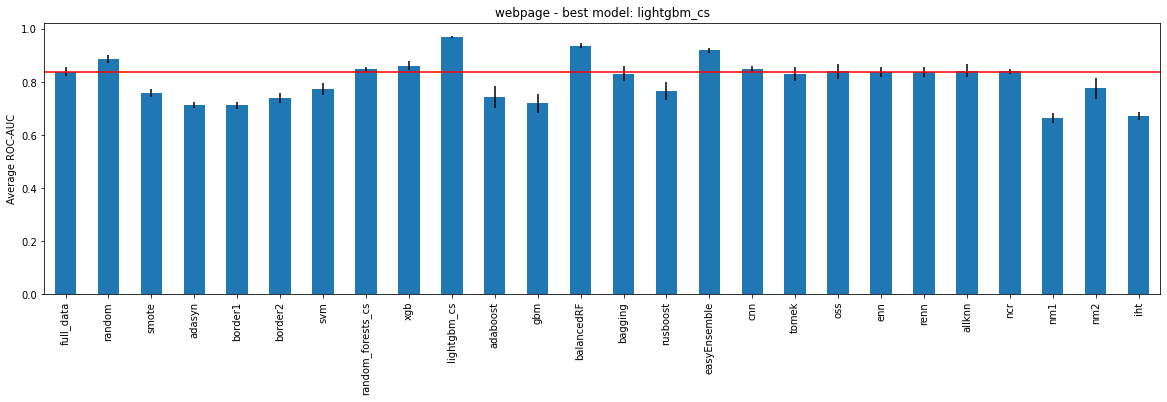

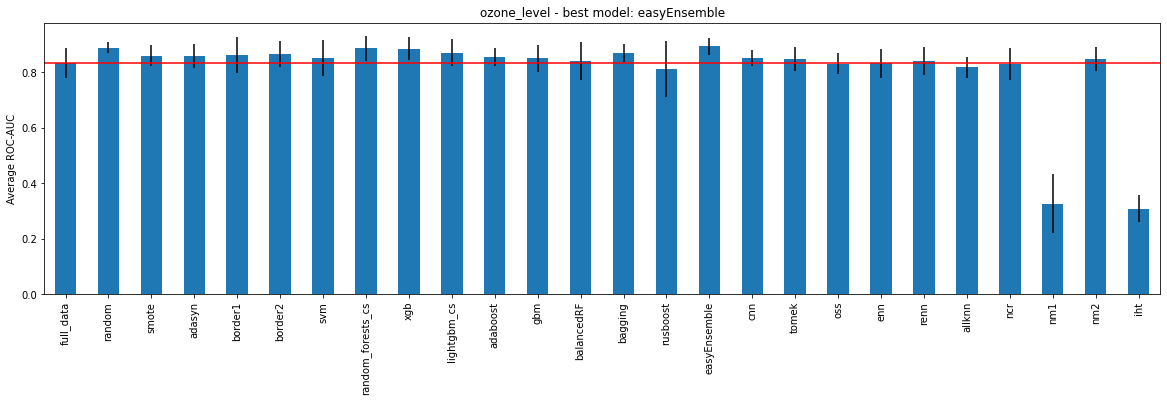

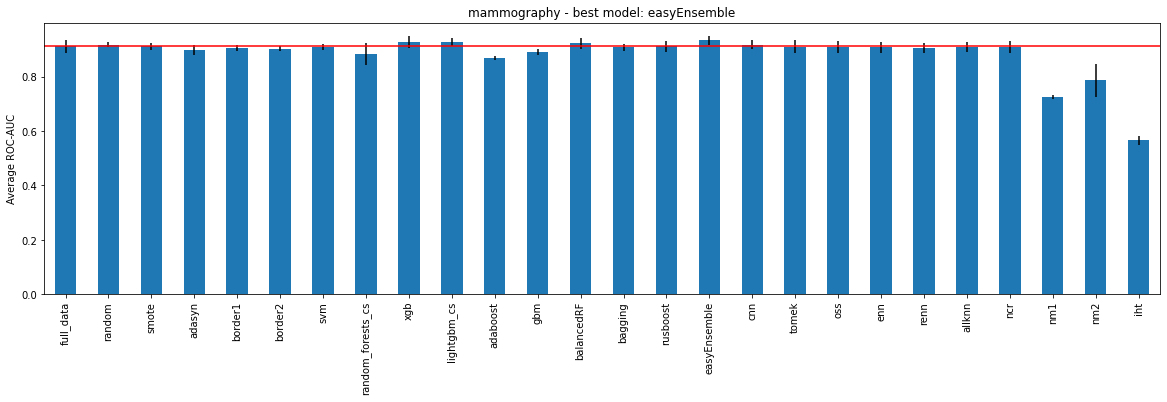

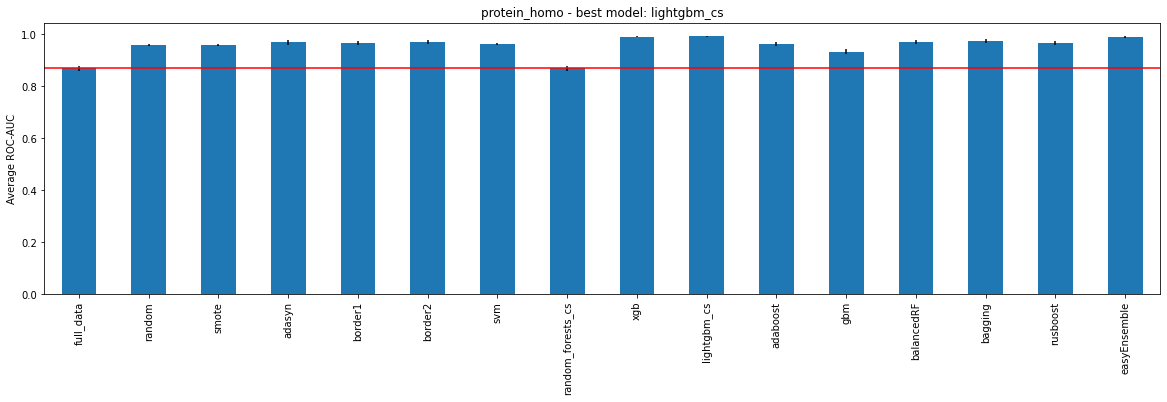

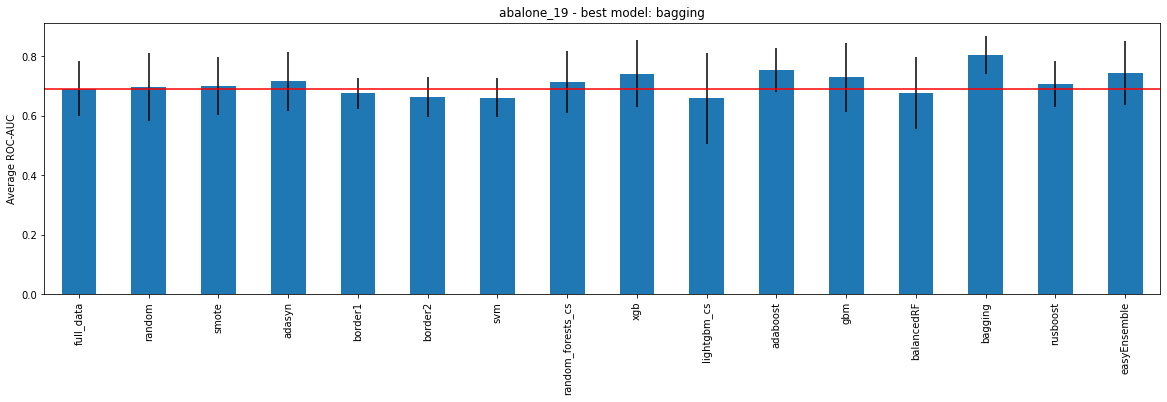

In [7]:
for dataset in ens_mean.keys():
    
    mean_s = pd.Series(os_mean[dataset])
    std_s = pd.Series(os_std[dataset])
    
    mean_s.plot.bar(yerr=[std_s, std_s], figsize=(20,5))
    
    best_model = max(os_mean[dataset], key=os_mean[dataset].get)
    plt.title(dataset + " - best model: " + best_model)
    
    plt.ylabel('Average ROC-AUC')
    plt.axhline(os_mean[dataset]['full_data'], color='r')    
    plt.show()

- The ensemble methods are always among the top performers.
- xgboost is hard to beat
- There is more than 1 ensemble option that returns good performing models.

Given that the ensemble models are the in general the best, then over or under-sampling does not make a lot of sense, they are time consuming and do not add any value respect to training an ensemble with or without cost-sensitive learning.

What we have not tested is xgboost with cost-sensitive learning or xgboost with over or undersampling. I leave that with you.